In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
# Read The CSV
titanic_data = pd.read_csv('data/titanic.csv')
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [3]:
# Find the number of passengers & shape
titanic_data.shape

(887, 8)

### Visualizing The Data

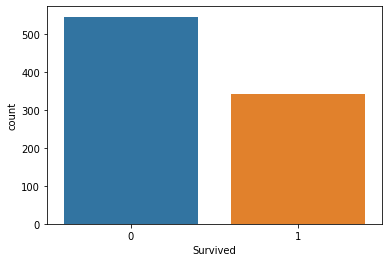

In [4]:
# Let's visualize the survivals
sns.countplot(x='Survived', data=titanic_data)

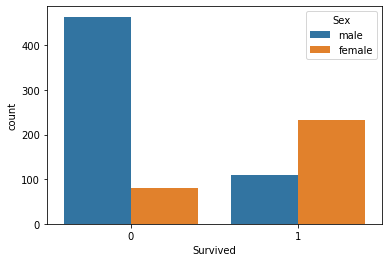

In [5]:
# Let's find how survivals conflict with sex
sns.countplot(x='Survived', hue='Sex', data=titanic_data)

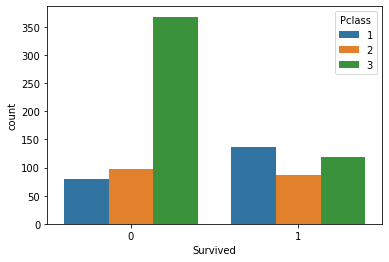

In [6]:
# Let's find how survivals conflict with passenger class
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)

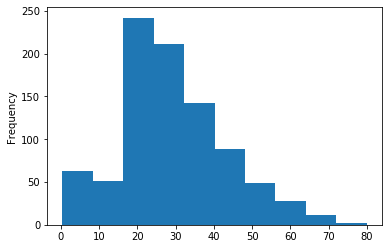

In [7]:
# Let's visualize and see the passengers ages
titanic_data['Age'].plot.hist()

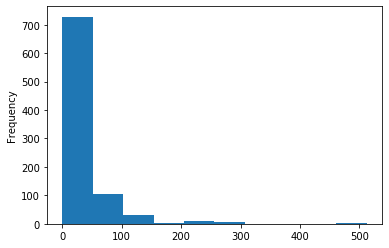

In [8]:
# Let's visualize the fare
titanic_data['Fare'].plot.hist()

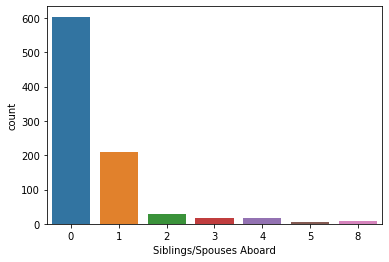

In [9]:
# Let's visualize the siblings/spouses
sns.countplot(x='Siblings/Spouses Aboard', data=titanic_data)

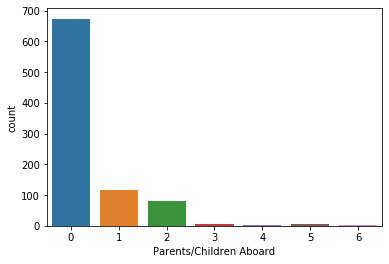

In [10]:
# Let's visualize the Parents/Children Aboard
sns.countplot(x='Parents/Children Aboard', data=titanic_data)

### Data Wrangling

In [12]:
# Info
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [17]:
# Check for Null OR NAN
titanic_data.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [21]:
# Check for data type
titanic_data.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

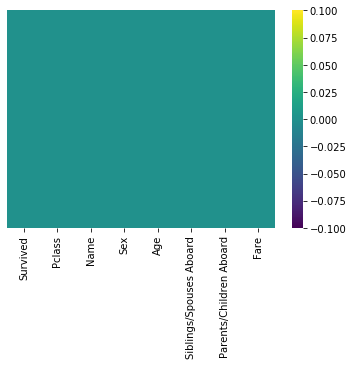

In [24]:
# Let's visualize there's no Null OR NAN
sns.heatmap(titanic_data.isnull(), yticklabels=False, cmap='viridis')

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
# Let's Encode The Data

In [39]:
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [43]:
# Remove uneccesary columns
titanic_data.drop('Name', axis=1, inplace=True)

In [44]:
titanic_data.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [45]:
# Split the data into X=samples Y=Predictor
X = titanic_data.drop('Survived', axis=1)
Y = titanic_data['Survived']

In [46]:
from sklearn.model_selection import train_test_split

In [48]:
# Let's split the data into Train & Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [50]:
X_train.shape, Y_train.shape

((709, 6), (709,))

In [51]:
X_test.shape, Y_test.shape

((178, 6), (178,))